# Passive and active colloidal chemotaxis in a microfluidic channel: mesoscopic and stochastic models

**Author:** Pierre de Buyl and Laurens Deprez  
*Supplemental information to the article by L. Deprez and P. de Buyl*

This notebook reports the analysis of the simulations of the *constant gradient* version
of the stochastic model for chemotaxis.

The simulations are performed by the Python program `run_cg_nm.py` found in this
directory and requires the compilation of the Cython code `stochastic_nanomotor_module.pyx`.

In [1]:
%matplotlib inline
import h5py
import matplotlib.pyplot as plt
from matplotlib.figure import SubplotParams
import numpy as np
from glob import glob
import os.path

plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['figure.subplot.hspace'] = 0.25
plt.rcParams['figure.subplot.wspace'] = 0.25
plt.rcParams['figure.subplot.left'] = 0.17
plt.rcParams['figure.subplot.top'] = 0.88
plt.rcParams['axes.labelsize'] = 16
plt.rcParams['font.size'] = 14


In [12]:
def summary_cg_nm(xy, phi, v):
    """Show a summary of the properties of constant gradient chemotactic simulations"""
    plt.figure(figsize=(8,12))
    plt.subplot(311)
    m = xy[:,::10,:].mean(axis=0)
    s = xy[:,::10,:].std(axis=0)
    plt.fill_between(np.arange(len(m)), m[:,1]-s[:,1], m[:,1]+s[:,1])
    plt.xlabel('$t$')
    plt.ylabel(r'$y$')
    
    plt.subplot(312)

    all_phi = np.arccos(np.sin(phi[:,phi.shape[1]//4:].reshape((-1,))))
    plt.hist(all_phi, bins=32, normed=True);
    plt.xlabel(r"$\theta$")
    plt.ylabel(r'$P(\theta)$')
    plt.xlim(0, np.pi)

    plt.subplot(313)

    plt.hist(xy[:,xy.shape[1]//4:,1].reshape((-1,)), bins=32, normed=True);
    plt.xlabel(r"$y$")
    plt.ylabel(r'$P(y)$')
    plt.xlim(0, 30)
    
def get_array(filename):
    """Read the xy, phi and v array from a simulation file."""
    with h5py.File(filename, 'r') as f:
        xy = f['xy'][:]
        phi = f['phi'][:]
        v = f['v'][:]
    return xy, phi, v


In [7]:
cg_location = '/pierre/work/20170118'

In [8]:
# Retrieve simulation data for the simulations with a chemotactic force on N only
runs = glob(os.path.join(cg_location, 'N_only_*.h5'))
runs.sort()

N_only_data = [get_array(r) for r in runs]

N_only_xy, N_only_phi, N_only_v = map(np.array, zip(*N_only_data))

In [9]:
# Retrieve simulation data for the simulations with a chemotactic force on N and C

runs = glob(os.path.join(cg_location, 'N_C_*.h5'))
runs.sort()

N_C_data = [get_array(r) for r in runs]

N_C_xy, N_C_phi, N_C_v = map(np.array, zip(*N_C_data))

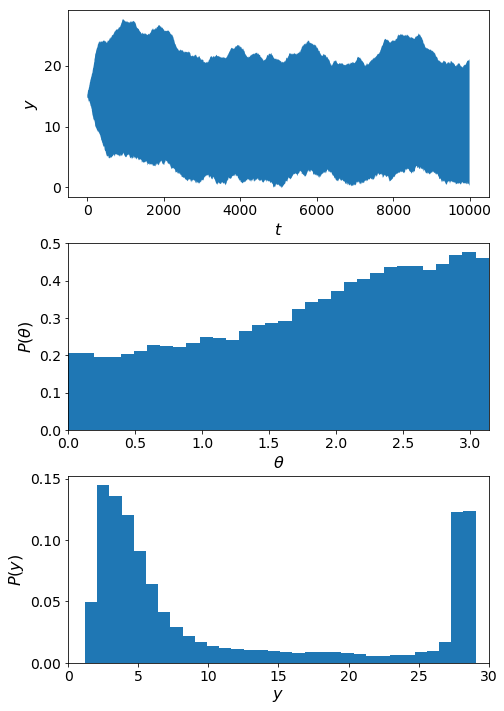

In [13]:
summary_cg_nm(N_only_xy, N_only_phi, N_only_v)
plt.savefig('N_only_cg.pdf')

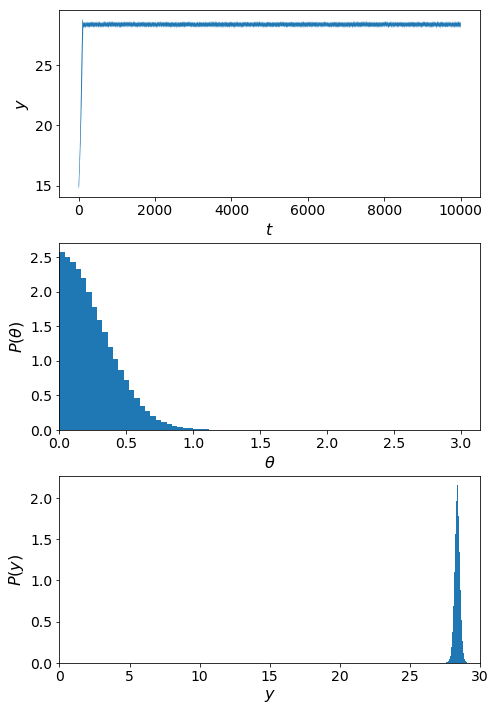

In [14]:
summary_cg_nm(N_C_xy, N_C_phi, N_C_v)
plt.savefig('N_C_cg.pdf')